#### Load pakker

In [1]:
import numpy as np
from numpy import sqrt, pi, sin, cos, cosh, log10
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib widget
np.set_printoptions(precision=10)

#### Definerer parametre. Der bruges atomare enheder. N=12 lader til at være fint for at køre scriptet.

In [2]:
N = 12

hbar = 1
m = 1

L = 1
a = 1
V_0 = (pi*pi)/(2*L*L)

#### Bølgefunktionen

In [3]:
def psi_n(x,n):
    if n%2==0:
        return sqrt(2/L)*sin(n*pi*x/L)
    return sqrt(2/L)*cos(n*pi*x/L)

#### Potentialet

In [4]:
def potential(x):
    return -V_0*(cosh(a*x)-cosh(a*L/2))/(1-cosh(a*L/2))

#### Matrix for den kinetiske energi

In [5]:
Ev = []
for n in range(N):
    E = ((n+1)*pi*hbar)**2/(2*m*L**2)
    Ev.append(E)

Em = np.diag(Ev)

#### Integranten

In [6]:
def func(x,n1,n2):
    # nedestående svarer til <ψ_n1|φ>, hvor φ = H|ψ_n2> 
    return psi_n(x,n1) * potential(x) * psi_n(x,n2)

#### Integralet

In [7]:
def calcMatrixElement(n1,n2):
    # beregning af <ψ_n1|H|ψ_n2>
    H_n1n2 = quad(func,-1/2,1/2,args=(n1+1,n2+1))[0]
    return H_n1n2

#### Udregning af integralet og indsættelse i Matricen 

In [8]:
def calcMatrix(N):
    Hmat = np.zeros((N,N))
    for n1 in range(N):
        for n2 in range(N):
            H_n1n2 = calcMatrixElement(n1,n2)
            Hmat[n1][n2] = H_n1n2 + Em[n1][n2]
    
    return Hmat
#print(Hmat)

#### Udregning af den relative fejl

In [9]:
N2 = np.linspace(1, N, N)

last_eig_val = 1

errors = []

for n in range(N):
    
    Num = n+1
    
    if (Num % 2) == 0:
        errors.append(err)
    else:
        Hmat = calcMatrix(Num)

        eigvals,eigvecs = np.linalg.eigh(Hmat)

        new_eig_val = eigvals[0]

        err = abs((last_eig_val-new_eig_val)/last_eig_val)
        errors.append(err)

        last_eig_val = new_eig_val


#print(N2)
#print(errors)
#print(len(N2))
#print(len(errors))

#### Fejl plot

C:\Users\Phili\AppData\Local\Temp\ipykernel_11448\2938313583.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(N2, errors, 'bo', color="black",markersize=8)


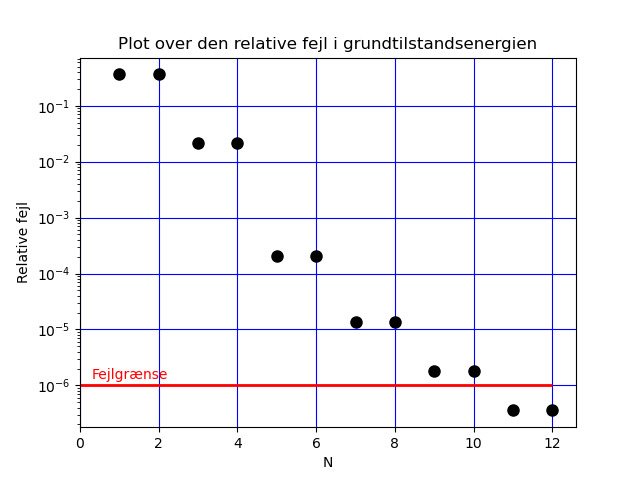

In [10]:
y = np.log10

fig, ax = plt.subplots()

ax.hlines(y=10**(-6), xmin=0, xmax=N, linewidth=2, color='r')

ax.plot(N2, errors, 'bo', color="black",markersize=8)
ax.set_yscale('log')

ax.set_xlim(xmin=0)
ax.set_ylabel("Relative fejl")
ax.set_xlabel("N")
ax.grid(visible=True, which='major', color='blue', linestyle='-', axis='both')
ax.text(0.3, 0.0000013, 'Fejlgrænse', color="red")
ax.set_title("Plot over den relative fejl i grundtilstandsenergien")


plt.show()

In [11]:
def ES_n(n):
    return (n*pi*hbar)**2/(2*m*a**2)


[  0.6220460535  16.168855576   40.9990281512  75.593286335
 120.0288424011 174.3234944994 238.4829290213 312.5096064184
 396.4042967643 490.1722099113 593.8042903349]
[  0.6220460535  16.168855576   40.9990281512  75.593286335
 120.0288424011]


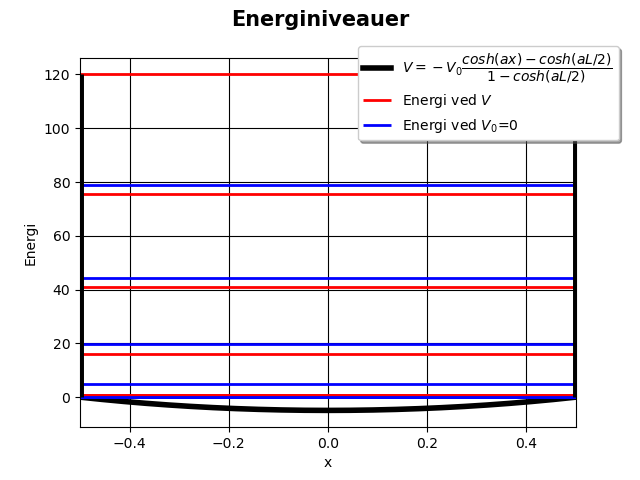

In [21]:
plt.close()
fig, ax = plt.subplots()

x = np.linspace(-L/2, L/2, 10000)

ax.plot(x, potential(x), color="black",linewidth=4, label = "$V = -V_{0} \dfrac{cosh(ax)-cosh(aL/2)}{1-cosh(aL/2)}$")

for i in range(len(eigvals[0:5])):
    
    if i == 0:
        
        ax.hlines(y=eigvals[i], xmin=-L/2, xmax=L/2, linewidth=2, color='r', label="Energi ved $V$")
    
        ax.hlines(y=ES_n(i), xmin=-L/2, xmax=L/2, linewidth=2, color='b' , label="Energi ved $V_{0}$=0")
    
    ax.hlines(y=eigvals[i], xmin=-L/2, xmax=L/2, linewidth=2, color='r')
    
    ax.hlines(y=ES_n(i), xmin=-L/2, xmax=L/2, linewidth=2, color='b')

#ax.set_yscale('log')

ax.vlines(x=-L/2, ymin=-0, ymax=120, linewidth=5, color='black')
ax.vlines(x=L/2, ymin=-0, ymax=120, linewidth=5, color='black')
ax.set_xlim(xmin=-L/2, xmax=L/2)
ax.legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True)
ax.set_ylabel("Energi")
ax.set_xlabel("x")
ax.grid(visible=True, which='major', color='black', linestyle='-', axis='both')
#ax.text(0.3, 0.0000013, 'Fejlgrænse', color="red")
#ax.set_title("Energi", loc='left')
fig.suptitle('Energiniveauer', fontsize=15, fontweight="bold")


print(eigvals)
print(eigvals[0:5])

In [91]:
Hmat = calcMatrix(12)

eigvals,eigvecs = np.linalg.eigh(Hmat)







print(eigvals)
print(eigvals[0:5])

[6.2204605352e-01 1.6168855053e+01 4.0999028151e+01 7.5593282893e+01
 1.2002884240e+02 1.7432347628e+02 2.3848292902e+02 3.1250946215e+02
 3.9640429676e+02 4.9016770961e+02 5.9380429033e+02 7.0730564182e+02]
[  0.6220460535  16.1688550526  40.9990281512  75.5932828926
 120.0288424011]
